# Code to create agents and teams

This notebook shows the code flow to create agents and teams using flo-ai

In [1]:
from flo_ai import FloSupervisor, FloAgent, FloSession, FloTeam, FloLinear
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search.tool import TavilySearchResults
from dotenv import load_dotenv

load_dotenv()

True

Code to create a simple tea, with 2 agents, each agent having one tool of itself

In [ ]:
llm = ChatOpenAI(temperature=0, model_name='gpt-4o')
session = FloSession(llm).register_tool(
    name="TavilySearchResults",
    tool=TavilySearchResults()
)

researcher = FloAgent.Builder(
    session,
    "Researcher", 
    "Do a research on the internet and find articles of relevent to the topic asked by the user", 
    [TavilySearchResults()]
).build()

blogger = FloAgent.Builder(
    session, 
    "BlogWriter", 
    "Able to write a blog using information provided", 
    [TavilySearchResults()]
).build()

marketing_team = FloTeam.Builder(session, "Marketing", [researcher, blogger]).build()
r1 = FloSupervisor.Builder(session, "Head-of-Marketing", marketing_team).build()
flo_team_1 = r1.build_routed_team()


In [3]:
def draw_to_file(graph, filename: str, xray=False):
    from PIL import Image as PILImage
    import io
    byte_image = graph.draw(xray)
    with io.BytesIO(byte_image) as image_io:
        image = PILImage.open(image_io)
        image.save(filename)

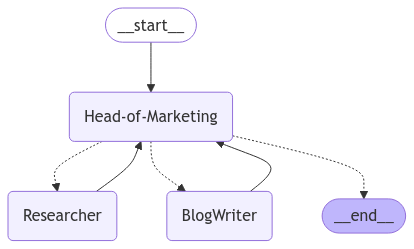

In [7]:
from IPython.display import Image, display

display(Image(flo_team_1.draw()))

A second team created for doing editorial suggestions

In [8]:
chief_editorial = FloAgent.Builder(
    session, 
    "Senior-Editor", 
    "Have a look at the article created and give editorial suggestions", 
    [TavilySearchResults()]
).build()

edit_team = FloTeam.Builder(session, "Editorial-Team", [chief_editorial]).build()
r2 = FloSupervisor.Builder(session, "Editor-Team-Routing", edit_team).build()

editorial_team = r2.build_routed_team()

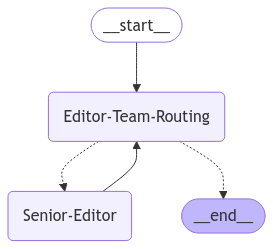

In [9]:
from IPython.display import Image, display

display(Image(editorial_team.draw()))

In [ ]:
journal_company = FloTeam.Builder(session, "Newspaper", [flo_team_1, editorial_team])

# TODO fix router config
r3 = FloLinear.Builder(
    session,
    "linear-router",
    journal_company
).build()

master_team = r3.build_routed_team()

In [7]:
draw_to_file(master_team, "master.png")

In [8]:
master_team.invoke("Write an article about CR7")



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'Cristiano Ronaldo biography'}`


[{'url': 'https://www.liveabout.com/cristiano-ronaldo-3557502', 'content': 'Learn about the life and career of Cristiano Ronaldo, the Portuguese footballer who plays for Real Madrid and is one of the best players in the world. Find out his achievements, awards, records, and controversies in this comprehensive biography.'}, {'url': 'https://www.biographyonline.net/sport/football/cristiano-ronaldo.html', 'content': "Learn about the life and career of Cristiano Ronaldo, one of the world's best footballers. From his early days in Portugal to his success at Manchester United, Real Madrid and Juventus, and his international achievements with Portugal."}, {'url': 'https://eurofootballer.com/who-is-cristiano-ronaldo-complete-biography-and-life-history/', 'content': "Learn about the life and achievements of Cristiano Ronaldo, one of the world's best footballers. From

{'messages': [HumanMessage(content='Write an article about CR7'),
  HumanMessage(content="### Cristiano Ronaldo: A Football Legend\n\n#### Early Life and Career Beginnings\n\nCristiano Ronaldo dos Santos Aveiro, commonly known as Cristiano Ronaldo or CR7, was born on February 5, 1985, in Funchal, Madeira, Portugal. From a young age, Ronaldo displayed an extraordinary talent for football, which led him to join the youth academy of Sporting CP in Lisbon. His exceptional skills quickly caught the attention of scouts from top European clubs.\n\n#### Rise to Stardom\n\nRonaldo's professional career began at Sporting CP, where he made his debut in the Primeira Liga at just 17 years old. His performance against Manchester United in a friendly match in 2003 was so impressive that it led to his transfer to the English club. At Manchester United, Ronaldo's career skyrocketed. Under the guidance of Sir Alex Ferguson, he developed into one of the best players in the world, winning three Premier Le